In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 실제 TTF 파일 경로 (예: 나눔고딕)
font_path = '/content/drive/MyDrive/NanumFontSetup_TTF_ALL/NanumGothic.ttf'

# 폰트 등록 및 적용
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [3]:
# 파일 불러오기
# df = pd.read_csv('/content/drive/MyDrive/data/2019-Oct.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2019-Nov.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2019-Dec.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2020-Jan.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2020-Feb.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2020-Mar.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2020-Apr.csv')
df = pd.read_parquet('/content/drive/MyDrive/data/cart_purchase_only.parquet')

In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2019-10-01,0,electronics,smartphone,None,None
1,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01,0,electronics,smartphone,None,None
2,2019-10-01 00:09:26+00:00,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,2019-10-01,0,electronics,audio,headphone,None
3,2019-10-01 00:09:33+00:00,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,2019-10-01,0,electronics,smartphone,None,None
4,2019-10-01 00:09:54+00:00,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01,0,electronics,audio,headphone,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075548,2020-03-31 23:59:35+00:00,cart,100011103,2053013554658804075,electronics.audio.headphone,acer,385.57,522177285,902aa3e5-957a-49e4-8638-ddbbe895808a,2020-03-31,23,electronics,audio,headphone,None
17075549,2020-03-31 23:59:35+00:00,cart,8700232,2232732089587859740,appliances.personal.hair_cutter,vitek,38.59,571822727,dabea208-878f-45bf-9865-fca43b201874,2020-03-31,23,appliances,personal,hair_cutter,None
17075550,2020-03-31 23:59:44+00:00,cart,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23,appliances,personal,massager,None
17075551,2020-03-31 23:59:50+00:00,cart,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None


In [54]:
# 결측치 확인
print(df.isnull().sum())

event_time              0
event_type              0
product_id              0
category_id             0
category_code           0
brand              826039
price                   0
user_id                 0
user_session           68
event_date              0
event_hour              0
category_lvl1           0
category_lvl2           0
category_lvl3     5464403
category_lvl4    17064336
dtype: int64


In [55]:
df['category_lvl1'].value_counts()

,count
category_lvl1,
construction,7090597
electronics,4428961
appliances,2891651
apparel,1577830
sport,1086514


In [56]:
# 유저별 event_type 집합 생성
user_events = df.groupby("user_id")["event_type"].apply(set)

# 'cart'와 'purchase' 모두 포함된 유저만 필터링
converted_users = user_events[user_events.apply(lambda x: {"cart", "purchase"}.issubset(x))]

# 유저 ID 리스트
converted_user_ids = converted_users.index.tolist()

# 출력 (상위 10개만)
print("cart → purchase 전환 유저 수:", len(converted_user_ids))
print("예시 유저 ID:", converted_user_ids[:10])


cart → purchase 전환 유저 수: 1413656
예시 유저 ID: [101875240, 107620212, 128968633, 136662675, 171409616, 177507559, 184265397, 192078182, 200985178, 210849689]


In [59]:
df_converted = df[df["user_id"].isin(converted_user_ids)]

# user_id 기준 내림차순 정렬
df_converted_sorted = df_converted.sort_values(by="user_id", ascending=False)
df_converted_sorted

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
17075547,2020-03-31 23:59:27+00:00,purchase,100068493,2232732093077520756,construction.tools.light,samsung,319.41,635165435,861f2378-076f-4ddd-85e3-9844923d03a9,2020-03-31,23,construction,tools,light,None
17075521,2020-03-31 23:54:56+00:00,cart,100068493,2232732093077520756,construction.tools.light,samsung,319.41,635165435,861f2378-076f-4ddd-85e3-9844923d03a9,2020-03-31,23,construction,tools,light,None
17075497,2020-03-31 23:48:47+00:00,purchase,28710347,2232732114124538702,apparel.shoes,None,66.67,635158569,6d8e94e7-6bdb-4050-9a37-4dc500c87df3,2020-03-31,23,apparel,shoes,None,None
17075504,2020-03-31 23:51:11+00:00,purchase,4100239,2232732098228126185,apparel.shoes,sony,552.91,635158569,6d8e94e7-6bdb-4050-9a37-4dc500c87df3,2020-03-31,23,apparel,shoes,None,None
17075490,2020-03-31 23:47:54+00:00,cart,28710347,2232732114124538702,apparel.shoes,None,66.67,635158569,6d8e94e7-6bdb-4050-9a37-4dc500c87df3,2020-03-31,23,apparel,shoes,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231942,2020-01-30 14:54:23+00:00,cart,20500418,2232732110022509290,sport.ski,elan,244.28,107620212,5a395feb-fc04-5289-f563-8cb2683f1a7f,2020-01-30,14,sport,ski,None,None
8891750,2020-01-16 18:09:31+00:00,cart,1005161,2232732093077520756,construction.tools.light,xiaomi,168.27,101875240,fbf58038-bd04-44ef-9a5d-95d05eb9ad53,2020-01-16,18,construction,tools,light,None
8892653,2020-01-16 18:18:22+00:00,purchase,100019252,2232732093077520756,construction.tools.light,xiaomi,184.52,101875240,fbf58038-bd04-44ef-9a5d-95d05eb9ad53,2020-01-16,18,construction,tools,light,None
8892302,2020-01-16 18:14:38+00:00,cart,100019252,2232732093077520756,construction.tools.light,xiaomi,184.52,101875240,fbf58038-bd04-44ef-9a5d-95d05eb9ad53,2020-01-16,18,construction,tools,light,None


# 구매 평균 주기

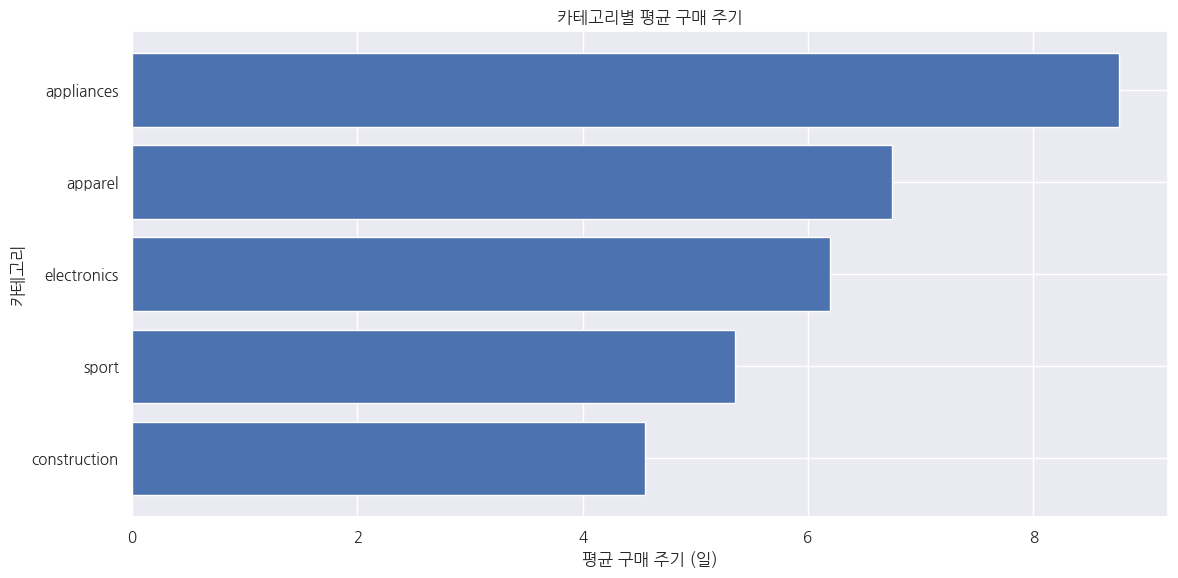

In [ ]:
# 구매 데이터 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'], utc=True)

# 정렬 후 이전 구매시점 계산
purchase_df.sort_values(by=['user_id', 'category_lvl1', 'event_time'], inplace=True)
purchase_df['prev_time'] = purchase_df.groupby(['user_id', 'category_lvl1'])['event_time'].shift(1)
purchase_df['interval_days'] = (purchase_df['event_time'] - purchase_df['prev_time']).dt.days

# category별 평균 구매 주기 계산
category_cycle = purchase_df.groupby('category_lvl1')['interval_days'].mean().dropna().reset_index()
category_cycle = category_cycle.sort_values(by='interval_days')

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(category_cycle['category_lvl1'], category_cycle['interval_days'])
plt.xlabel('평균 구매 주기 (일)')
plt.ylabel('카테고리')
plt.title('카테고리별 평균 구매 주기')
plt.tight_layout()
plt.show()


# 구매자들 행동 특성

In [ ]:
# 구매 데이터만 추출
purchase_df = df[df['event_type'] == 'purchase'].copy()
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'], utc=True)

In [ ]:
# 사용자별 카테고리 구매 요약
user_category_summary = purchase_df.groupby(['user_id', 'category_lvl1']).agg(
    purchase_count=('event_type', 'count'),
    total_spent=('price', 'sum'),
    first_purchase=('event_time', 'min'),
    last_purchase=('event_time', 'max'),
    unique_brands=('brand', pd.Series.nunique)
).reset_index()

# 구매 주기 계산
user_category_summary['purchase_cycle'] = (
    (user_category_summary['last_purchase'] - user_category_summary['first_purchase']).dt.days
)


In [ ]:
# 카테고리별 평균값 집계
category_profile = user_category_summary.groupby('category_lvl1').agg(
    avg_purchase_count=('purchase_count', 'mean'),
    avg_total_spent=('total_spent', 'mean'),
    avg_purchase_cycle=('purchase_cycle', 'mean'),
    avg_brand_variety=('unique_brands', 'mean'),
    num_unique_users=('user_id', 'nunique')
).round(2).reset_index()


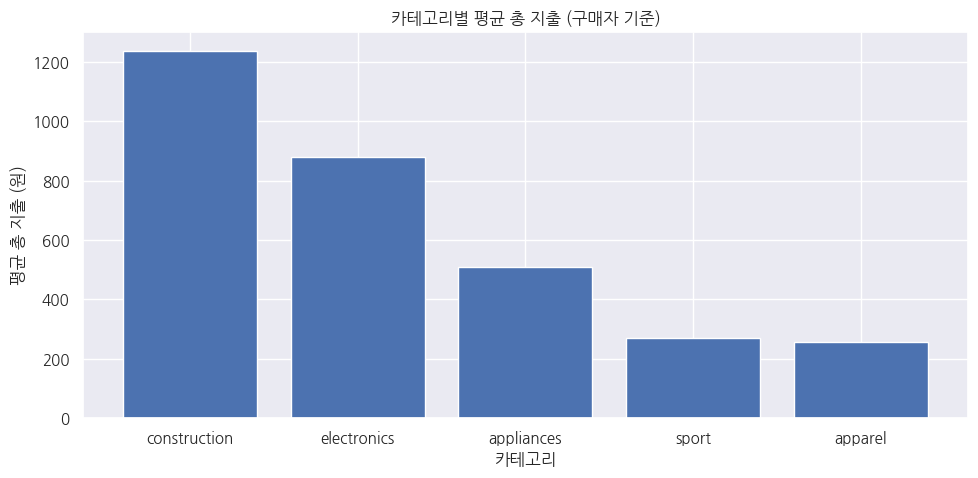

In [ ]:
import matplotlib.pyplot as plt

top5 = category_profile.sort_values(by='avg_total_spent', ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.bar(top5['category_lvl1'], top5['avg_total_spent'])
plt.title("카테고리별 평균 총 지출 (구매자 기준)")
plt.ylabel("평균 총 지출 (달러)")
plt.xlabel("카테고리")
plt.grid(True)
plt.tight_layout()
plt.show()


### 카테고리별 구매자 유형 분포 분석
분석 목적:
어떤 카테고리는 한 번만 구매하는 유저가 많고,
어떤 카테고리는 재구매 고객 비율이 높을 수 있음

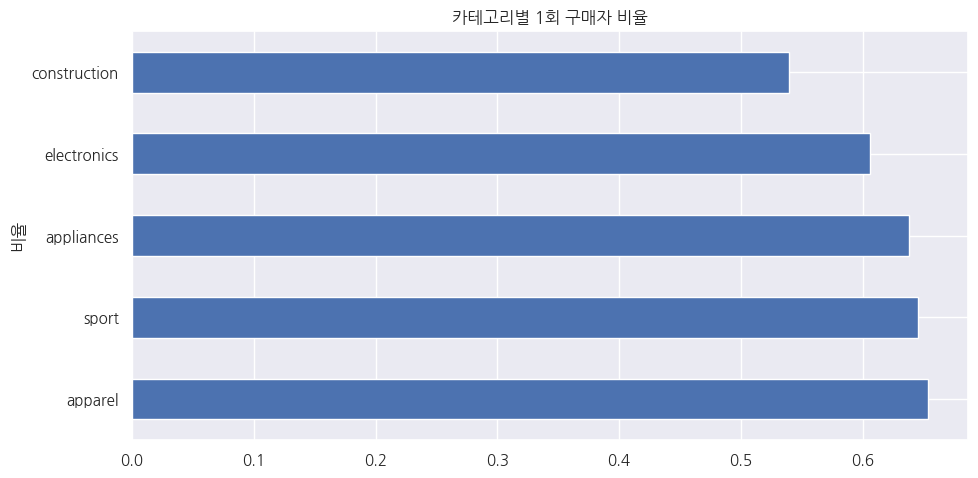

In [ ]:
# 유저-카테고리별 구매 횟수 계산
user_cat_counts = purchase_df.groupby(['user_id', 'category_lvl1']).size().reset_index(name='purchase_count')

# 구매 횟수 1회 vs 다회 비율 계산
user_cat_counts['buyer_type'] = user_cat_counts['purchase_count'].apply(lambda x: 'one-time' if x == 1 else 'repeat')

category_type_dist = user_cat_counts.groupby(['category_lvl1', 'buyer_type']).size().unstack(fill_value=0)

# 비율 계산
category_type_dist['one_time_ratio'] = category_type_dist['one-time'] / (category_type_dist.sum(axis=1))

# 시각화
category_type_dist['one_time_ratio'].sort_values(ascending=False).plot(kind='barh', figsize=(10,5))
plt.title('카테고리별 1회 구매자 비율')
plt.ylabel('비율')
plt.tight_layout()
plt.show()


### 카테고리별 구매 전환율 분석 (cart → purchase)
분석 목적:
카테고리별로 "장바구니에 넣지만 구매는 잘 안 되는" 곳이 어디인지 파악

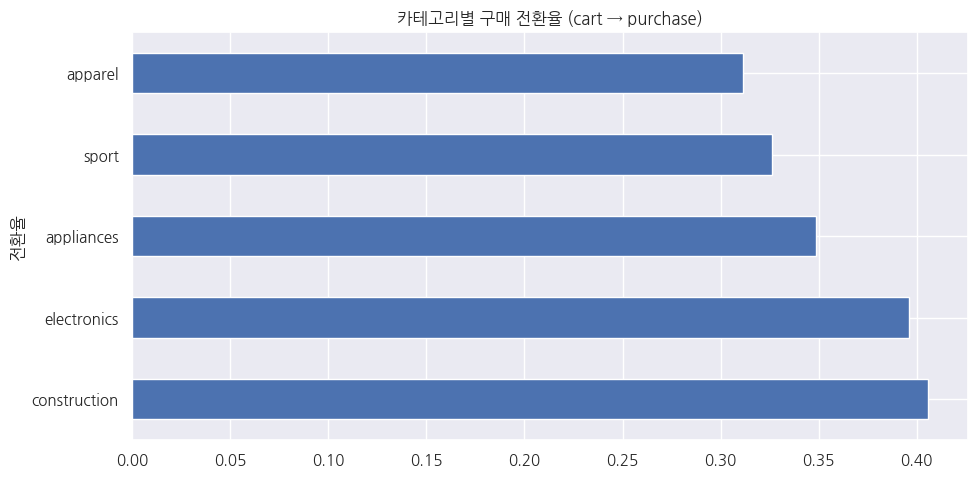

In [ ]:
# cart와 purchase 수를 category 기준으로 집계
cart_counts = df[df['event_type'] == 'cart'].groupby('category_lvl1').size()
purchase_counts = df[df['event_type'] == 'purchase'].groupby('category_lvl1').size()

conversion_rate = (purchase_counts / cart_counts).dropna().sort_values(ascending=False)

# 시각화
conversion_rate.plot(kind='barh', figsize=(10,5))
plt.title('카테고리별 구매 전환율 (cart → purchase)')
plt.ylabel('전환율')
plt.tight_layout()
plt.show()

### 카테고리별 브랜드 집중도
분석 목적:
어떤 카테고리는 특정 브랜드 의존도가 높고,
어떤 카테고리는 유저들이 브랜드를 다양하게 고르는 경향이 있음

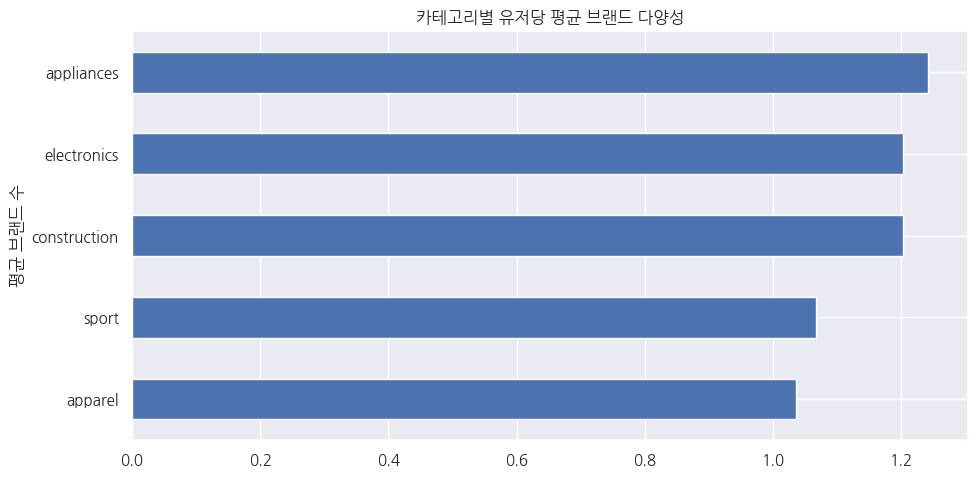

In [ ]:
brand_diversity = purchase_df.groupby(['category_lvl1', 'user_id'])['brand'].nunique().reset_index()
brand_diversity_avg = brand_diversity.groupby('category_lvl1')['brand'].mean()

brand_diversity_avg.sort_values().plot(kind='barh', figsize=(10,5))
plt.title("카테고리별 유저당 평균 브랜드 다양성")
plt.ylabel("평균 브랜드 수")
plt.tight_layout()
plt.show()

| 분석 방식         | 파악할 수 있는 인사이트       |
| ------------- | ------------------- |
| ✅ 구매 횟수 유형 분석 | 충성 고객 vs 1회 고객      |
| ✅ 전환율 분석      | 관심은 많지만 구매율 낮은 카테고리 |
| ✅ 브랜드 다양성     | 충성 브랜드 선호 여부        |
| ✅ 총 지출/주기     | 고가/저가, 정기 구매 성향     |

# 유저 활동 분석

### 1. 유저별 방문 일수 (DAU 기준)
- 각 유저가 며칠 방문했는지
-“유저별 방문 일수 (DAU 기준)”의 의미
각 유저가 며칠 동안 사이트(또는 앱)를 방문했는지를 세는 것
→ 한 유저가 "DAU" 집계에 몇 번 등장했는지를 구하는 것

In [47]:
# 유저별 고유 방문 일수 계산
user_dau_days = df.groupby("user_id")["event_date"].nunique()

# 상위 10개 출력
print(user_dau_days.sort_values(ascending=False).head(10))

user_id
554551310    163
513320236    161
549109608    154
512409624    148
513230794    147
561174161    141
566448225    134
568831413    133
538340540    132
513322839    132
Name: event_date, dtype: int64


In [48]:
# 유저별 고유 방문 일수 계산
user_dau_days = df.groupby("user_session")["event_date"].nunique()

# 상위 10개 출력
print(user_dau_days.sort_values(ascending=False).head(10))


user_session
12ec3547-84f2-4eab-bd64-725ddc03dd5b    61
985aa12c-d4ab-4e7d-a343-46b55da15e6d    31
3a3154c3-055f-4b69-a9c9-cea29c3b529f    24
c2c9213c-8ad8-4155-8af2-7931981eeae9    23
2885a74f-c9bc-43e8-8e3e-ebc92343a129    22
b3b586ab-daf4-4f43-83f1-dc2692c0ef99    22
d87d2b5f-1f4b-4654-ba68-85283aecdacd    19
c572554e-d877-4153-be19-95427601d0b5    18
3e0db92b-9f2a-40c7-9b9f-44a08dd2e844    13
842b1e3f-5d6f-46ff-96c0-0c8c81efa1a1    11
Name: event_date, dtype: int64


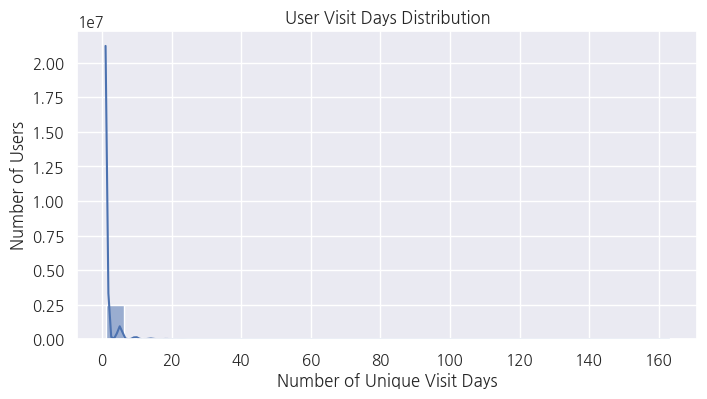

In [7]:
# 유저별 방문 일 수
user_daily_visits = df.groupby(["user_id", "event_date"]).size().reset_index(name="visit_count")
user_visit_days = user_daily_visits.groupby("user_id")["event_date"].nunique().reset_index(name="days_visited")

# 시각화
plt.figure(figsize=(8, 4))
sns.histplot(user_visit_days["days_visited"], bins=30, kde=True)
plt.title("User Visit Days Distribution")
plt.xlabel("Number of Unique Visit Days")
plt.ylabel("Number of Users")
plt.show()

### 2. 재방문 유저 비율
- 1일 이상 방문한 유저 비율

In [11]:
revisited_users = user_visit_days[user_visit_days["days_visited"] > 1]["user_id"].nunique()
total_users = user_visit_days["user_id"].nunique()
revisit_rate = revisited_users / total_users

print(f"재방문한 유저 수: {revisited_users}")
print(f"전체 유저 수: {total_users}")
print(f"재방문률: {revisit_rate:.2%}")

재방문한 유저 수: 1095939
전체 유저 수: 2589054
재방문률: 42.33%


In [49]:
# 유저별 방문일 수 계산
user_visit_days = df.groupby("user_id")["event_date"].nunique().reset_index()
user_visit_days.columns = ["user_id", "days_visited"]

# 하루만 방문한 유저 수
one_time_users = user_visit_days[user_visit_days["days_visited"] == 1]["user_id"].nunique()

# 재방문 유저 수 (2일 이상)
revisit_users = user_visit_days[user_visit_days["days_visited"] > 1]["user_id"].nunique()

# 전체 유저 수
total_users = user_visit_days["user_id"].nunique()

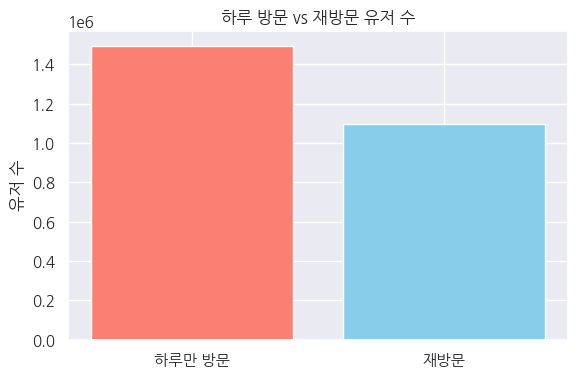

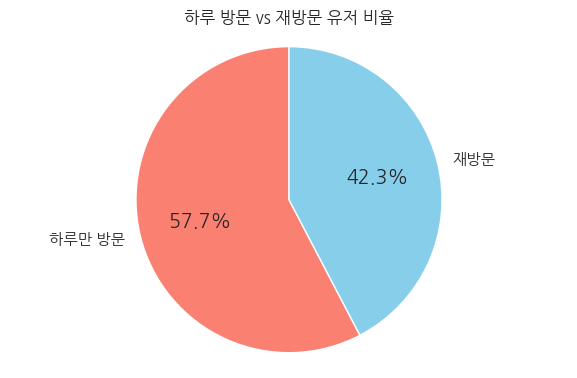

In [53]:
labels = ["하루만 방문", "재방문"]
counts = [one_time_users, revisit_users]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=["salmon", "skyblue"])
plt.title("하루 방문 vs 재방문 유저 수")
plt.ylabel("유저 수")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.pie(counts, labels=labels, autopct="%.1f%%", colors=["salmon", "skyblue"], startangle=90)
plt.title("하루 방문 vs 재방문 유저 비율")
plt.axis("equal")
plt.tight_layout()
plt.show()


### 3. 유저별 평균 방문 간격 (일 단위)
- 평균 며칠마다 재방문했는지

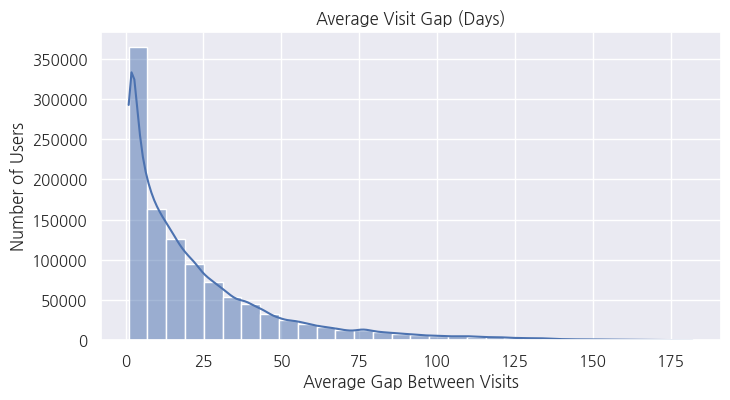

In [9]:
# 유저별 평균 방문 간격
user_daily_visits_sorted = user_daily_visits.sort_values(["user_id", "event_date"])

# 차이 계산
user_daily_visits_sorted["prev_date"] = user_daily_visits_sorted.groupby("user_id")["event_date"].shift()
user_daily_visits_sorted["gap"] = (user_daily_visits_sorted["event_date"] - user_daily_visits_sorted["prev_date"]).dt.days

# 평균 방문 간격
avg_gap = user_daily_visits_sorted.groupby("user_id")["gap"].mean().dropna().reset_index(name="avg_gap_days")

# 시각화
plt.figure(figsize=(8,4))
sns.histplot(avg_gap["avg_gap_days"], bins=30, kde=True)
plt.title("Average Visit Gap (Days)")
plt.xlabel("Average Gap Between Visits")
plt.ylabel("Number of Users")
plt.show()


### 4. 유저별 이벤트 유형 비율 분석 (cart/purchase)
- cart/purchase 활동 비중

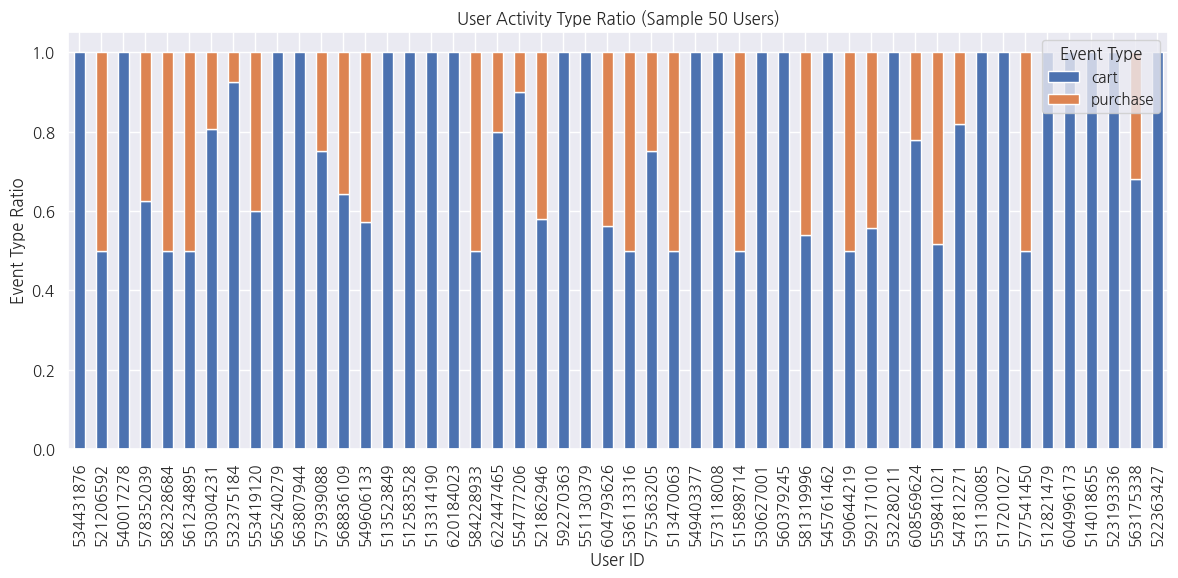

In [10]:
# 유저별 이벤트 수
event_dist = df.groupby(["user_id", "event_type"]).size().unstack(fill_value=0)

# 비율로 변환
event_ratio = event_dist.div(event_dist.sum(axis=1), axis=0)

# 시각화 (예: 상위 50명만)
event_ratio_sample = event_ratio.sample(50)

event_ratio_sample.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("User Activity Type Ratio (Sample 50 Users)")
plt.ylabel("Event Type Ratio")
plt.xlabel("User ID")
plt.legend(title="Event Type")
plt.tight_layout()
plt.show()

# 카테고리 기반 분석
| 분석 주제   | 활용 컬럼                        | 목적         |
| ------- | ---------------------------- | ---------- |
| 이벤트 흐름  | event\_type, category\_lvl\* | 전환율 분석     |
| 시간대 트렌드 | event\_hour, category\_lvl\* | 마케팅 시간 전략  |
| 가격대 분석  | price, category\_lvl\*       | 고가/저가 분포   |
| 브랜드 인기도 | brand, category\_lvl\*       | 인기 브랜드 파악  |
| 사용자 행동  | user\_id, event\_type        | 충성도 사용자 탐색 |

### 1. 이벤트 유형별 카테고리 분석

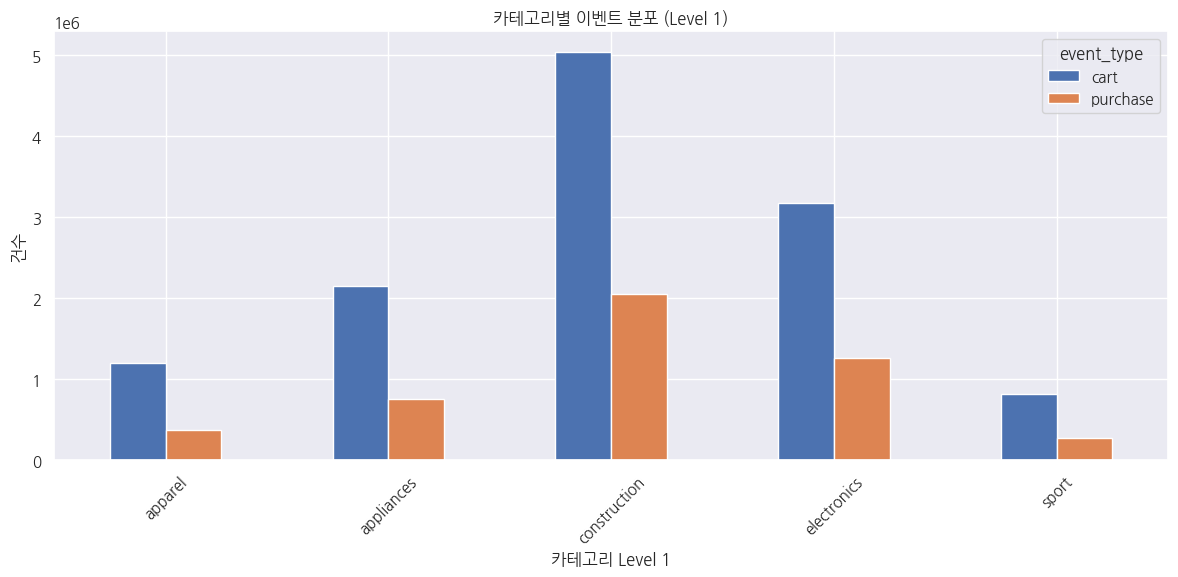

In [16]:
event_counts = df.groupby(['category_lvl1', 'event_type']).size().unstack().fillna(0)
event_counts.plot(kind='bar', figsize=(12, 6))
plt.title('카테고리별 이벤트 분포 (Level 1)')
plt.xlabel('카테고리 Level 1')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. 전환율 분석 (View → Cart → Purchase)

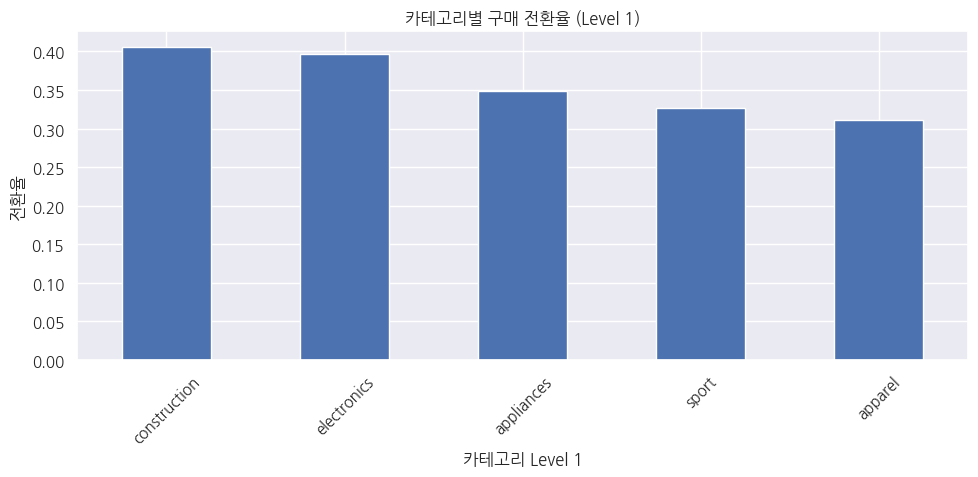

In [18]:
cart_count = df[df["event_type"] == "cart"].groupby("category_lvl1").size()
purchase_count = df[df["event_type"] == "purchase"].groupby("category_lvl1").size()
conversion_rate = (purchase_count / cart_count).fillna(0)

conversion_rate.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("카테고리별 구매 전환율 (Level 1)")
plt.ylabel("전환율")
plt.xlabel("카테고리 Level 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. 시간대별 인기 카테고리 분석

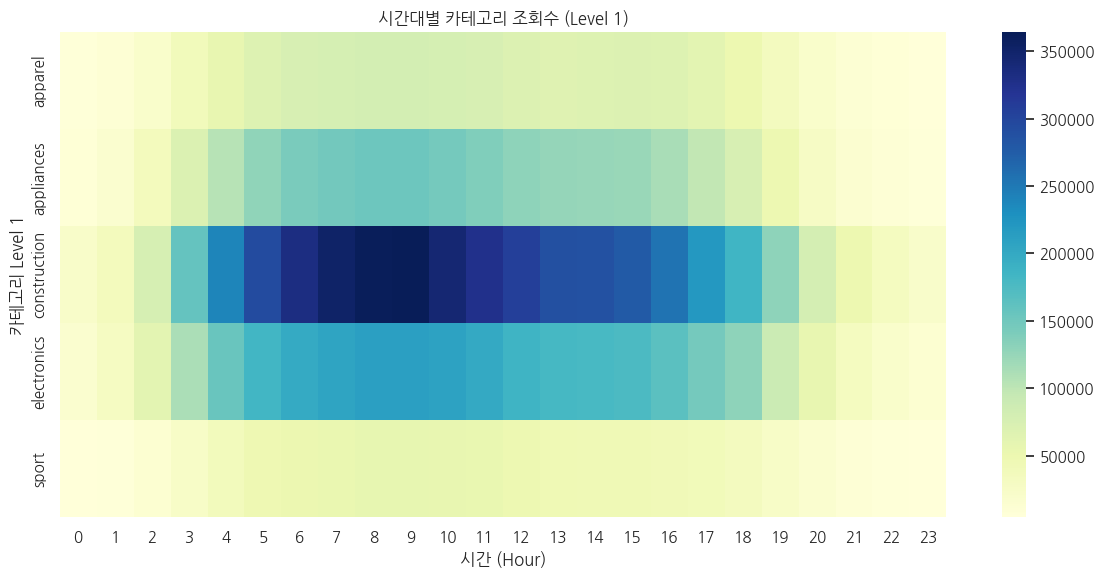

In [19]:
# 카테고리 & 시간대별 조회수
heat_data = df[df["event_type"] == "cart"].groupby(['event_hour', 'category_lvl1']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heat_data.T, cmap="YlGnBu", annot=False)
plt.title("시간대별 카테고리 조회수 (Level 1)")
plt.xlabel("시간 (Hour)")
plt.ylabel("카테고리 Level 1")
plt.tight_layout()
plt.show()

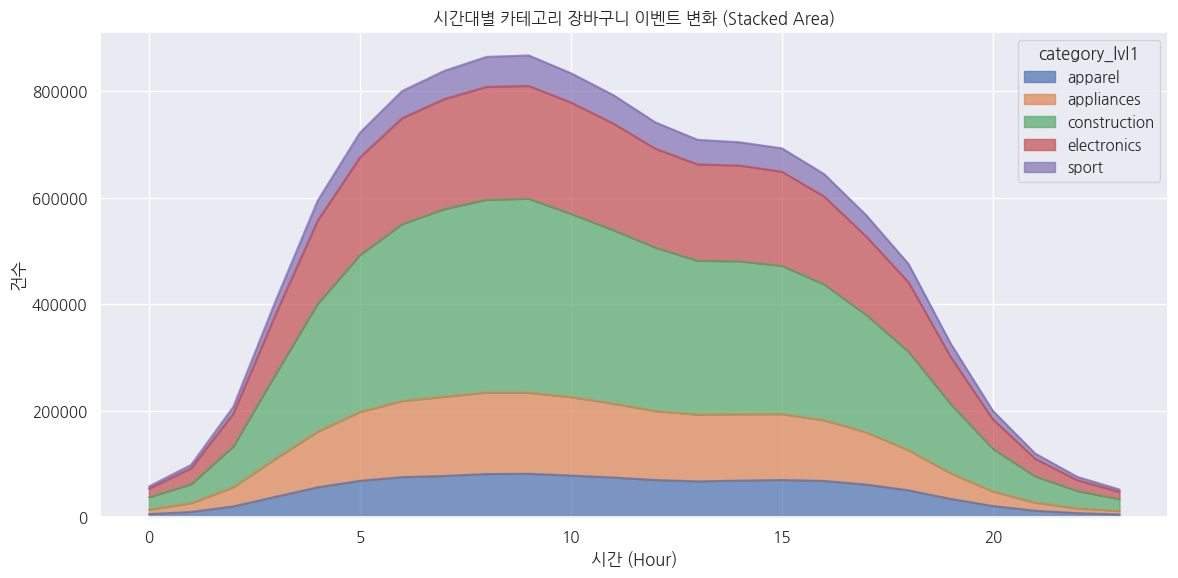

In [27]:
cart_by_hour_cat = df[df["event_type"] == "cart"].groupby(["event_hour", "category_lvl1"]).size().unstack().fillna(0)

cart_by_hour_cat.plot.area(figsize=(12, 6), alpha=0.7)
plt.title("시간대별 카테고리 장바구니 이벤트 변화 (Stacked Area)")
plt.xlabel("시간 (Hour)")
plt.ylabel("건수")
plt.tight_layout()
plt.show()

### 4. 카테고리별 가격 분포

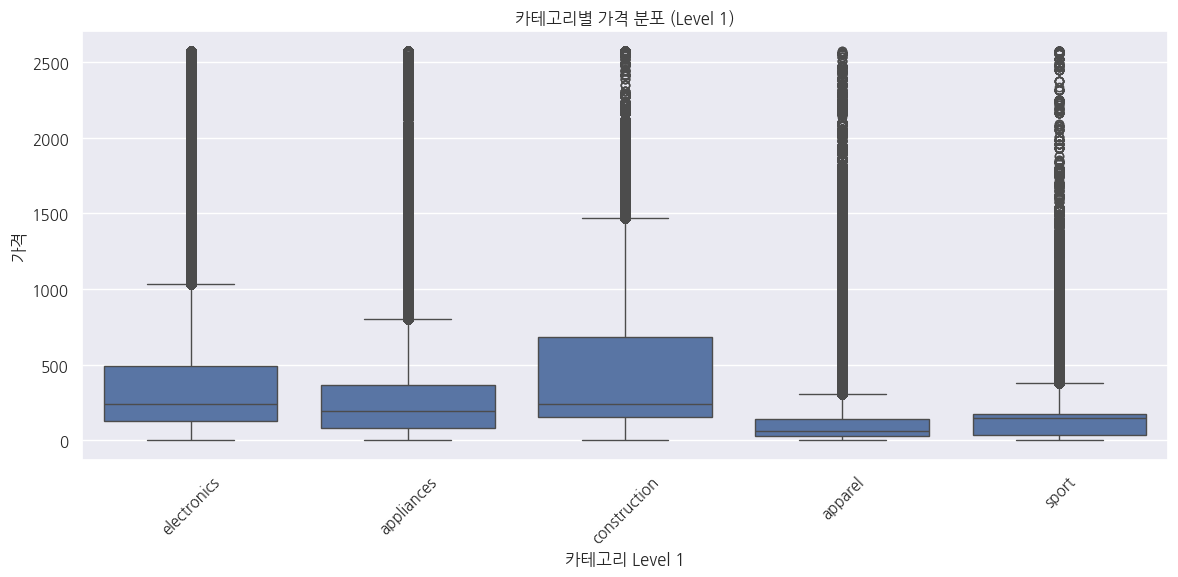

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="category_lvl1", y="price")
plt.title("카테고리별 가격 분포 (Level 1)")
plt.xlabel("카테고리 Level 1")
plt.ylabel("가격")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

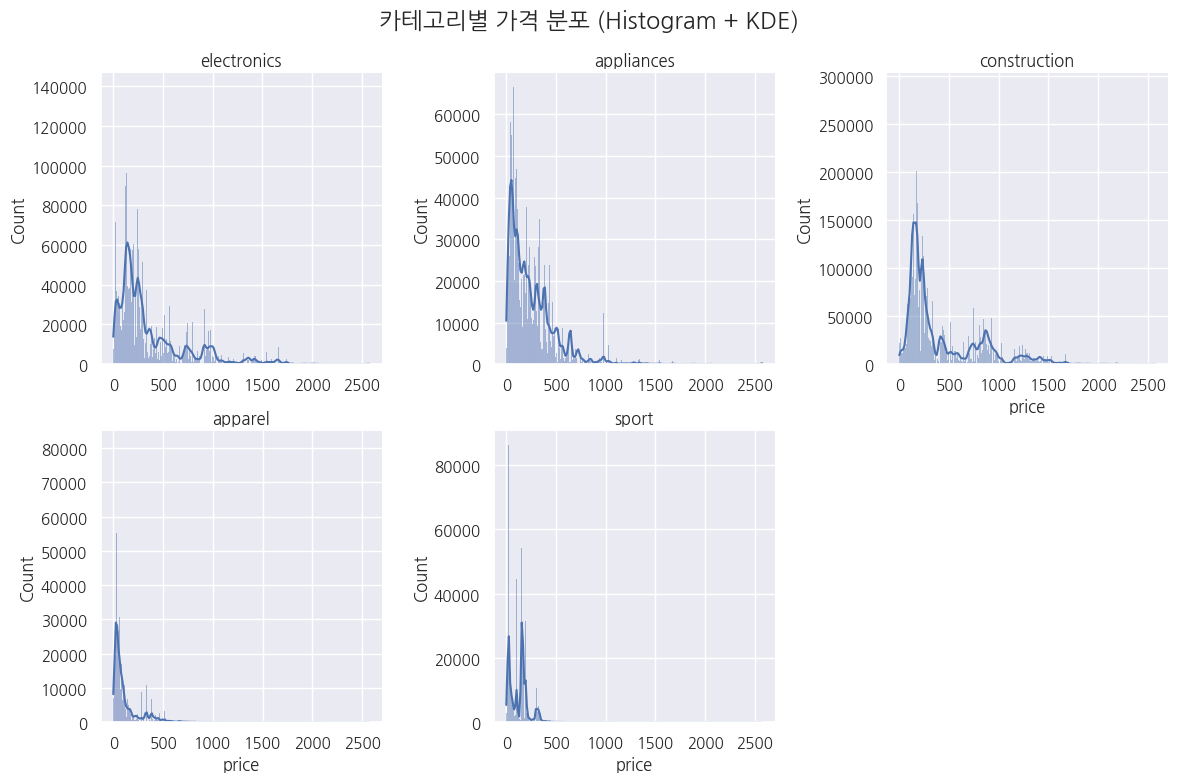

In [26]:
g = sns.FacetGrid(df, col="category_lvl1", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "price", kde=True)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("카테고리별 가격 분포 (Histogram + KDE)")
plt.show()

### 5. 인기 브랜드 분석

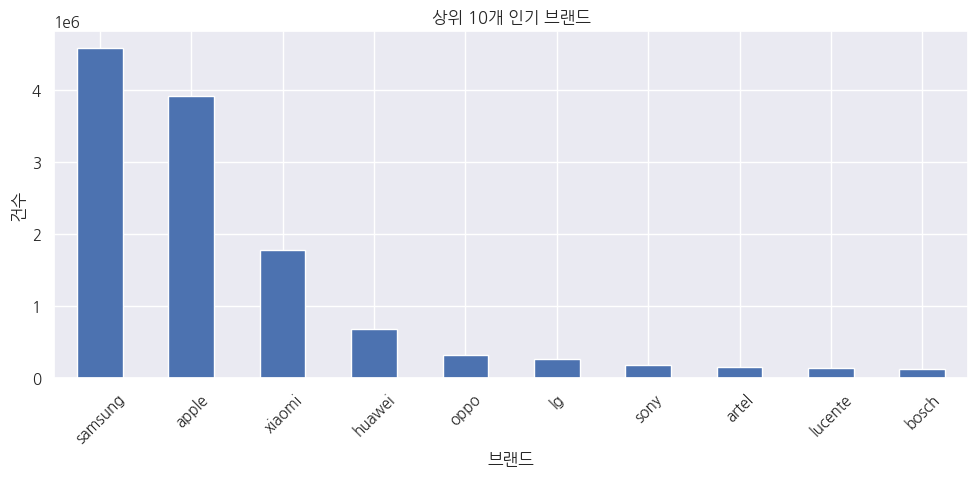

In [21]:
top_brands = df["brand"].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_brands.plot(kind="bar")
plt.title("상위 10개 인기 브랜드")
plt.xlabel("브랜드")
plt.ylabel("건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
top_brands_by_category = (
    df.groupby(["category_lvl1", "brand"])
    .size()
    .reset_index(name="count")
    .sort_values(["category_lvl1", "count"], ascending=[True, False])
)

# 카테고리별 상위 5개 브랜드만 추출
top5_brands_by_category = top_brands_by_category.groupby("category_lvl1").head(5)

# 출력
print(top5_brands_by_category)

     category_lvl1    brand    count
1918       apparel   xiaomi   169139
1662       apparel     sony   127366
1557       apparel  samsung    74216
1486       apparel  respect    42836
1312       apparel    omron    30730
2974    appliances  samsung   525990
2652    appliances       lg   222203
2036    appliances    artel   126886
2671    appliances  lucente   123049
2534    appliances  indesit   109289
3863  construction  samsung  2683064
3281  construction    apple  2150680
4013  construction   xiaomi   978981
3560  construction   huawei   466902
3759  construction     oppo   227760
4073   electronics    apple  1239489
4731   electronics  samsung  1228032
4900   electronics   xiaomi   416339
4401   electronics   huawei   172022
4028   electronics     acer   101797
4952         sport    apple   492734
5630         sport   xiaomi   148041
5495         sport  samsung    65499
5219         sport      jbl    36309
5203         sport   huawei    20950


In [25]:
for cat in top5_brands_by_category['category_lvl1'].unique():
    brands = top5_brands_by_category[top5_brands_by_category['category_lvl1'] == cat]['brand'].tolist()
    print(f"[{cat}] 상위 브랜드: {', '.join(brands)}")

[apparel] 상위 브랜드: xiaomi, sony, samsung, respect, omron
[appliances] 상위 브랜드: samsung, lg, artel, lucente, indesit
[construction] 상위 브랜드: samsung, apple, xiaomi, huawei, oppo
[electronics] 상위 브랜드: apple, samsung, xiaomi, huawei, acer
[sport] 상위 브랜드: apple, xiaomi, samsung, jbl, huawei


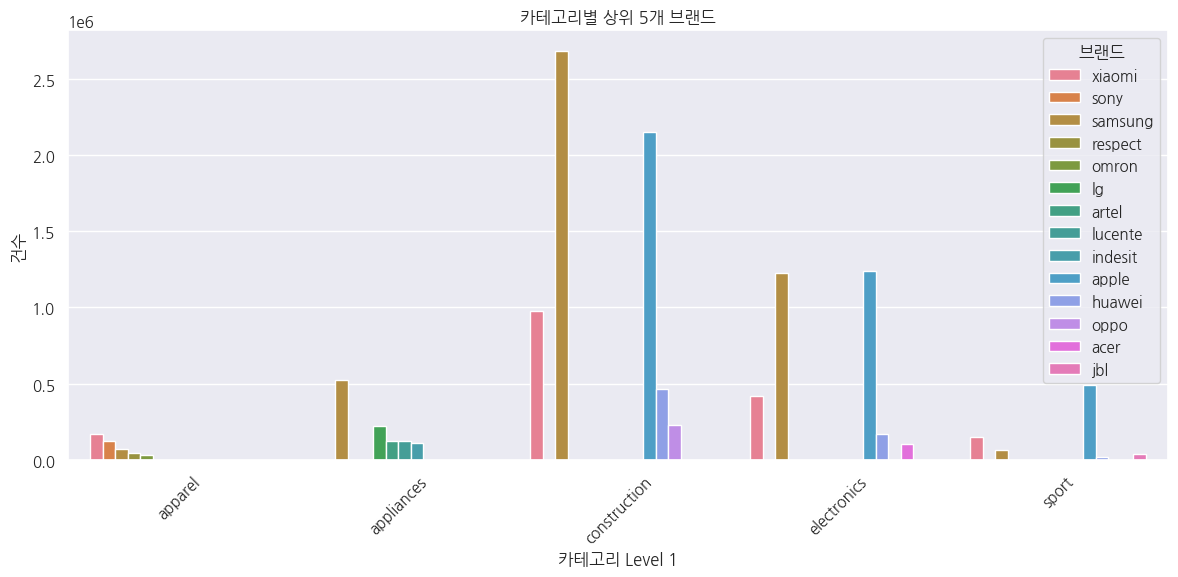

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top5_brands_by_category,
    x="category_lvl1",
    y="count",
    hue="brand"
)
plt.title("카테고리별 상위 5개 브랜드")
plt.xlabel("카테고리 Level 1")
plt.ylabel("건수")
plt.xticks(rotation=45)
plt.legend(title="브랜드")
plt.tight_layout()
plt.show()

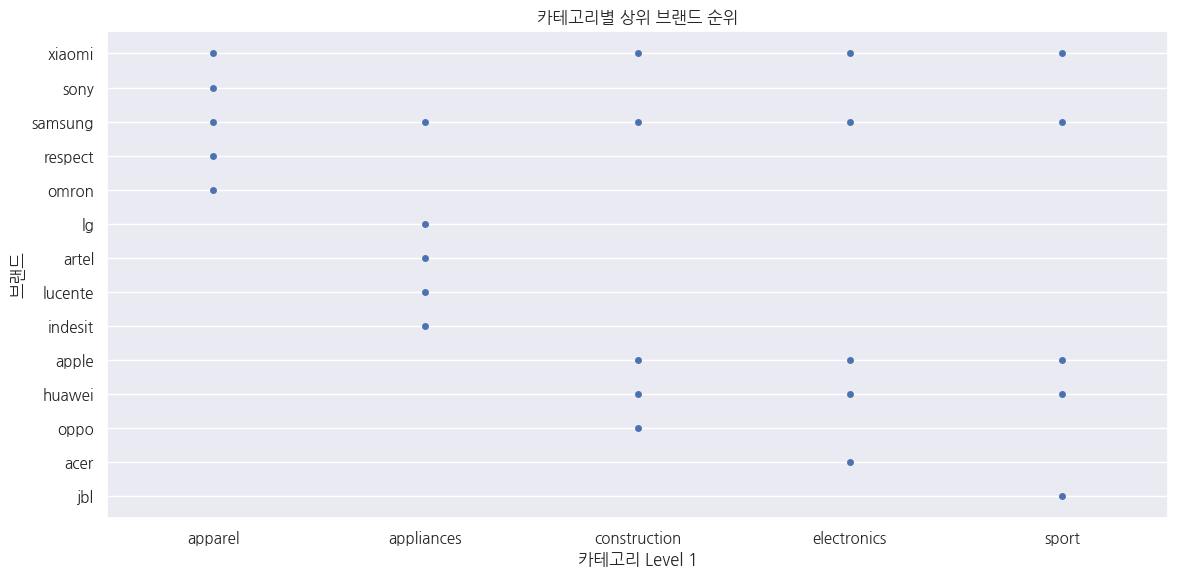

In [24]:
plt.figure(figsize=(12, 6))
sns.swarmplot(
    data=top5_brands_by_category,
    x="category_lvl1",
    y="brand"
)
plt.title("카테고리별 상위 브랜드 순위")
plt.xlabel("카테고리 Level 1")
plt.ylabel("브랜드")
plt.tight_layout()
plt.show()


# 다른 레벨 기반 분석
| 분석 주제    | 사용 컬럼                        | 활용 예              |
| -------- | ---------------------------- | ----------------- |
| 트렌드      | event\_hour + category\_lvl3 | 시간대별 인기 제품군       |
| 전환율      | event\_type + category\_lvl4 | 전환율 높은 세부 카테고리 파악 |
| 마진/단가 분석 | price + category\_lvl2\~4    | 고가/저가 군 탐색        |
| 사용자 행동   | user\_id + category\_lvl\*   | 특정 카테고리 선호도       |


### 1. 카테고리 Level 2 기준 이벤트 분석

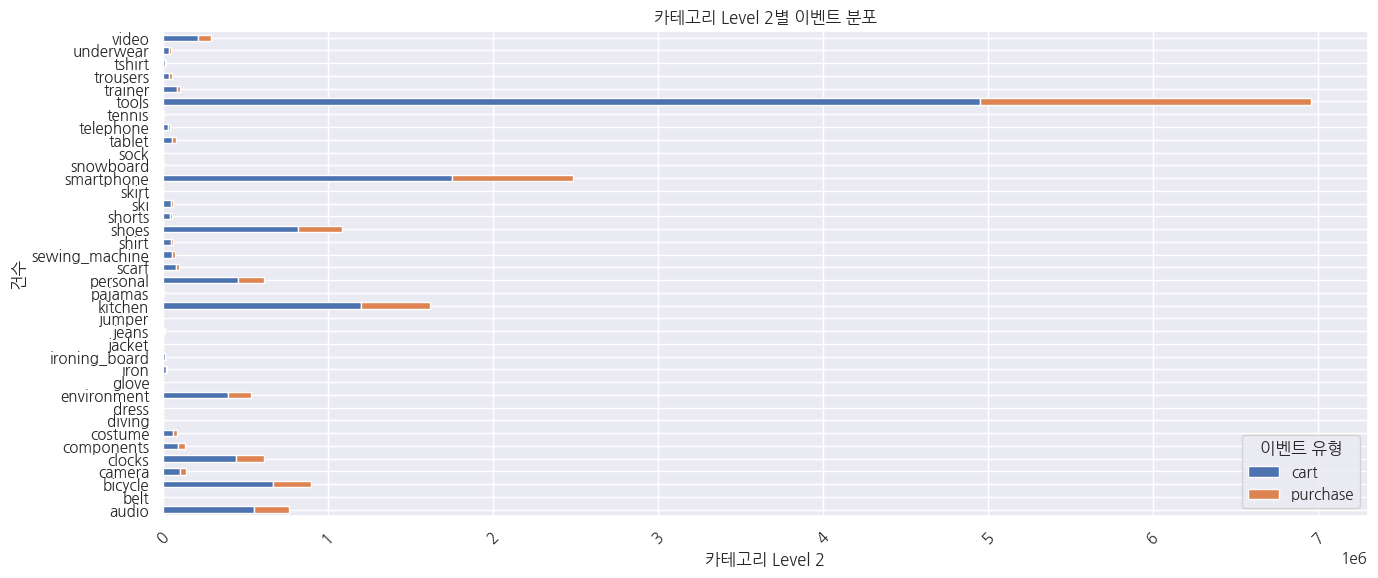

In [29]:
event_counts_lvl2 = df.groupby(["category_lvl2", "event_type"]).size().unstack().fillna(0)

event_counts_lvl2.plot(kind='barh', figsize=(14, 6), stacked=True)
plt.title("카테고리 Level 2별 이벤트 분포")
plt.xlabel("카테고리 Level 2")
plt.ylabel("건수")
plt.xticks(rotation=45)
plt.legend(title="이벤트 유형")
plt.tight_layout()
plt.show()

### 2. Level 3 기준 구매 전환율 분석

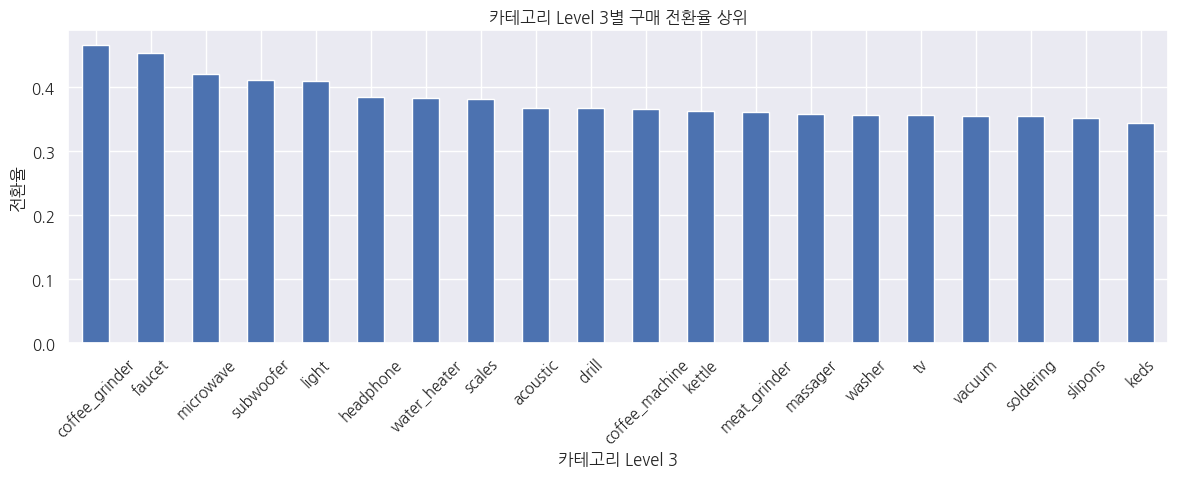

In [30]:
cart = df[df["event_type"] == "cart"].groupby("category_lvl3").size()
purchase = df[df["event_type"] == "purchase"].groupby("category_lvl3").size()
conversion_lvl3 = (purchase / cart).fillna(0).sort_values(ascending=False)

conversion_lvl3.head(20).plot(kind='bar', figsize=(12, 5))
plt.title("카테고리 Level 3별 구매 전환율 상위")
plt.ylabel("전환율")
plt.xlabel("카테고리 Level 3")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. 카테고리 Level 2별 평균 가격 비교

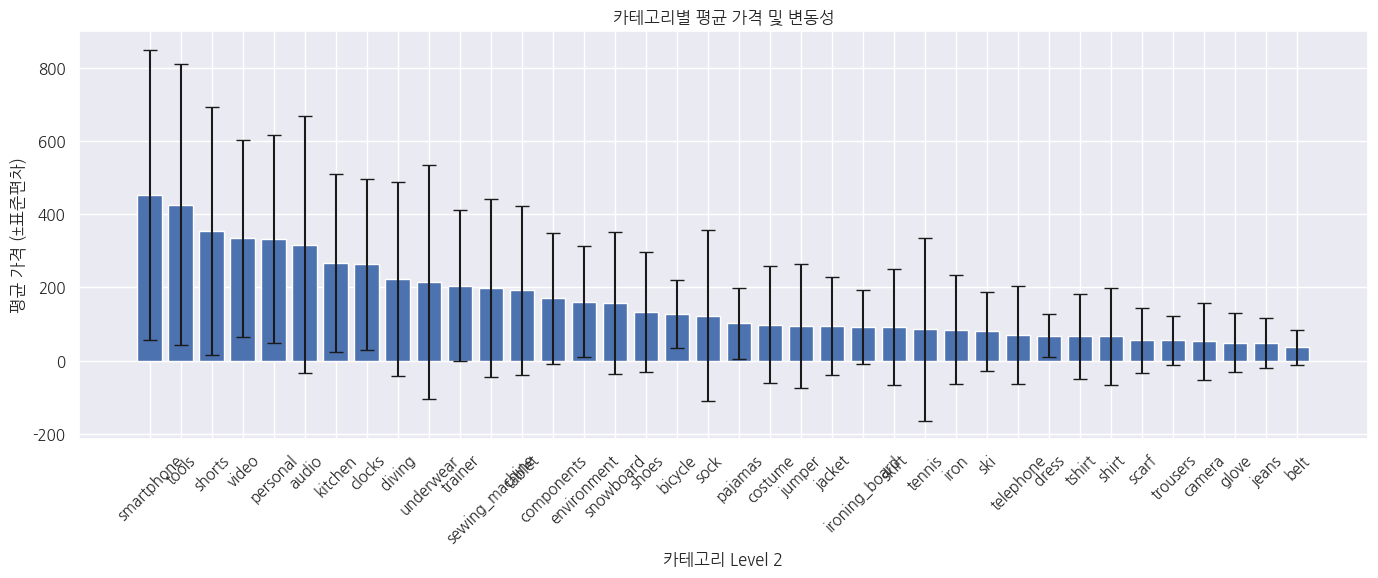

In [35]:
price_stats = df.groupby("category_lvl2")["price"].agg(["mean", "std"]).sort_values("mean", ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(price_stats.index, price_stats["mean"], yerr=price_stats["std"], capsize=5)
plt.title("카테고리별 평균 가격 및 변동성")
plt.xlabel("카테고리 Level 2")
plt.ylabel("평균 가격 (±표준편차)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# 1. 평균 가격 계산
mean_price = df.groupby("category_lvl2")["price"].mean()

# 2. 구매 수 계산
purchase_count = df[df["event_type"] == "purchase"].groupby("category_lvl2").size()

# 3. category_lvl2 → category_lvl1 매핑 (가장 많이 등장한 lvl1 기준)
lvl2_to_lvl1 = (
    df.groupby("category_lvl2")["category_lvl1"]
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
)

# 4. 하나의 DataFrame으로 결합
price_purchase_df = pd.concat([mean_price, purchase_count.rename("purchase_count"), lvl2_to_lvl1.rename("category_lvl1")], axis=1).fillna(0)

# 5. 다중 정렬: category_lvl1 > category_lvl2 > purchase_count > price
price_purchase_df = price_purchase_df.sort_values(
    by=["category_lvl1", "category_lvl2", "purchase_count", "price"],
    ascending=[True, True, False, False]
)

# 6. 출력
price_purchase_df

,price,purchase_count,category_lvl1
category_lvl2,,,
belt,36.683918,154,apparel
costume,98.041651,19517,apparel
dress,68.819914,383,apparel
glove,49.659017,1136,apparel
jacket,94.254204,177,apparel
jeans,47.460849,3467,apparel
jumper,94.408615,1131,apparel
pajamas,101.830104,2069,apparel
scarf,55.443240,16513,apparel


/tmp/ipython-input-36-1782511387.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(price_purchase_df.index, rotation=45, ha="right")


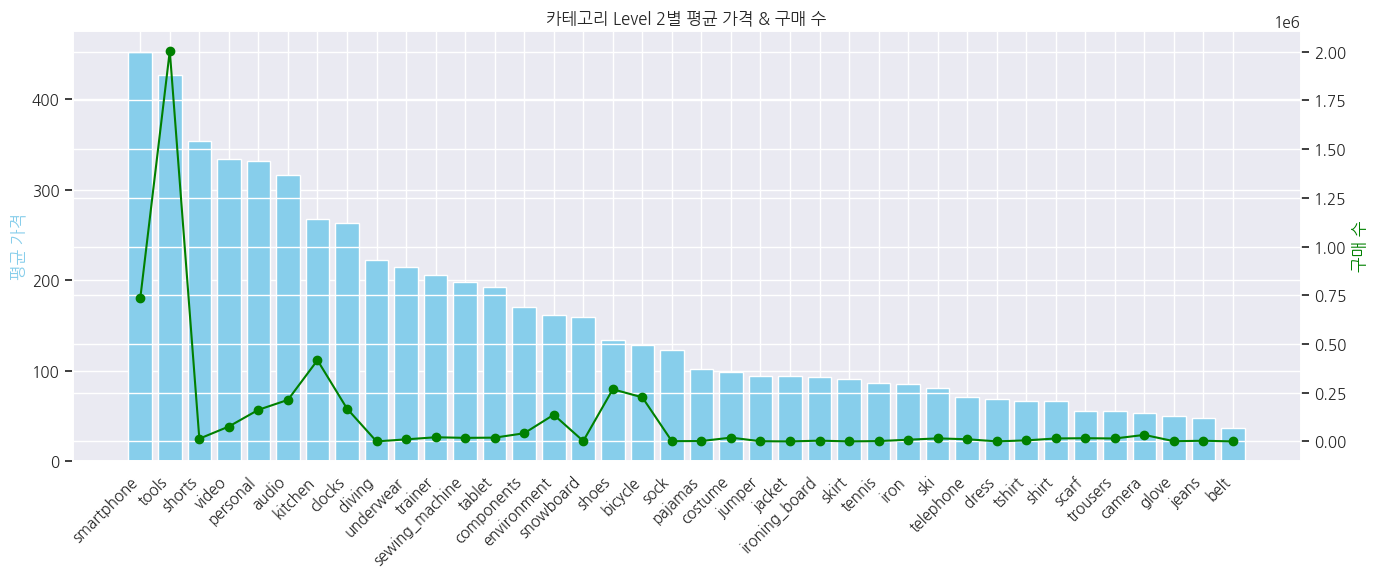

In [36]:
# 복합 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

# 막대: 평균 가격
ax1.bar(price_purchase_df.index, price_purchase_df["price"], color="skyblue", label="평균 가격")
ax1.set_ylabel("평균 가격", color="skyblue")
ax1.set_xticklabels(price_purchase_df.index, rotation=45, ha="right")

# 선: 구매 수
ax2 = ax1.twinx()
ax2.plot(price_purchase_df.index, price_purchase_df["purchase_count"], color="green", marker='o', label="구매 수")
ax2.set_ylabel("구매 수", color="green")

# 제목 및 정리
plt.title("카테고리 Level 2별 평균 가격 & 구매 수")
fig.tight_layout()
plt.show()

In [41]:
# 기존 DataFrame 활용
# price_purchase_df: category_lvl2, price, purchase_count, category_lvl1 포함

# category_lvl1 기준 그룹화
lvl1_summary = price_purchase_df.groupby("category_lvl1").agg({
    "price": "mean",              # 평균 가격
    "purchase_count": "sum"       # 총 구매 수
}).sort_values("price", ascending=False)

# 출력
print(lvl1_summary)

                    price  purchase_count
category_lvl1                            
construction   298.290877         2046734
electronics    240.253305         1256645
appliances     189.292754          747197
sport          146.748685          267283
apparel        102.980940          374525


/tmp/ipython-input-42-3201181505.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(lvl1_summary.index, rotation=45, ha="right")


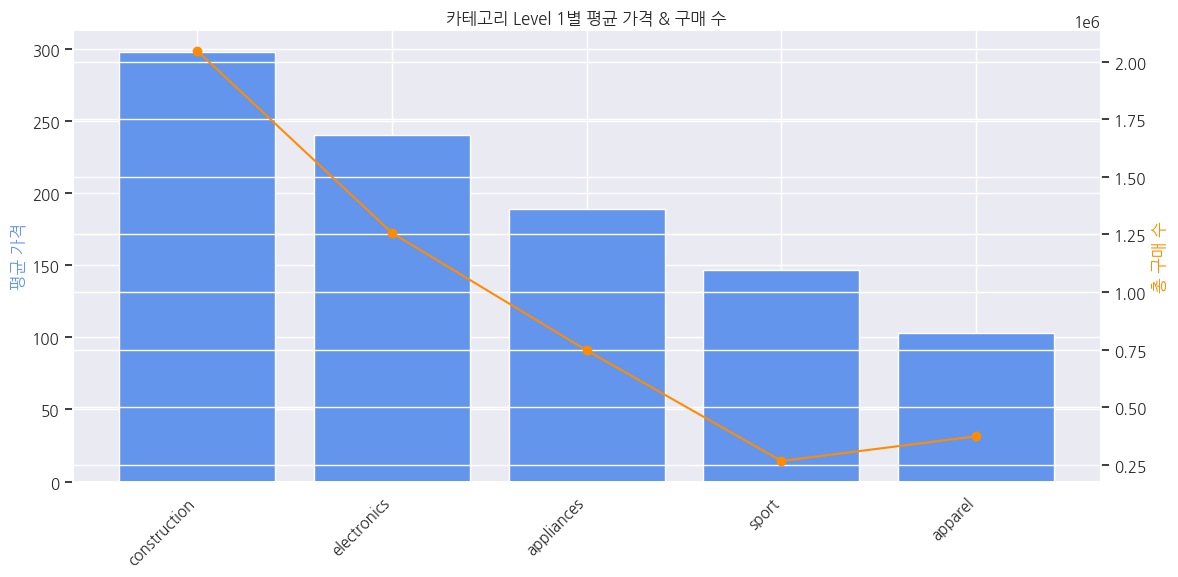

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대: 평균 가격
ax1.bar(lvl1_summary.index, lvl1_summary["price"], color="cornflowerblue")
ax1.set_ylabel("평균 가격", color="cornflowerblue")
ax1.set_xticklabels(lvl1_summary.index, rotation=45, ha="right")

# 선: 총 구매 수
ax2 = ax1.twinx()
ax2.plot(lvl1_summary.index, lvl1_summary["purchase_count"], color="darkorange", marker="o")
ax2.set_ylabel("총 구매 수", color="darkorange")

plt.title("카테고리 Level 1별 평균 가격 & 구매 수")
plt.tight_layout()
plt.show()


# 세션 기반 분석

### 세션당 카트 수

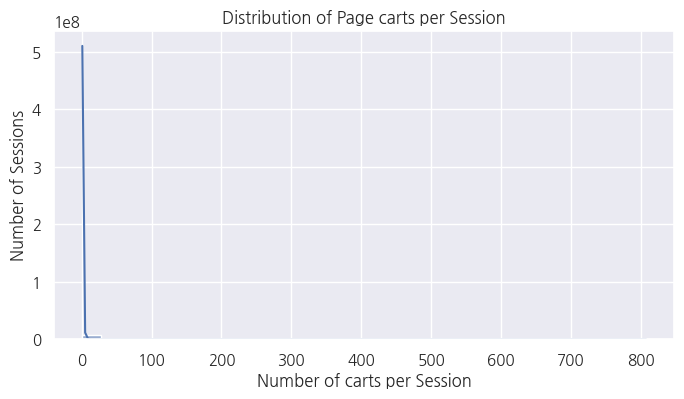

In [13]:
# 세션별 카트 담는 수 (cart 이벤트 수)
session_carts = df[df["event_type"] == "cart"].groupby("user_session")["event_type"].count().reset_index(name="cart_count")

# 히스토그램 시각화
plt.figure(figsize=(8,4))
sns.histplot(session_carts["cart_count"], bins=30, kde=True)
plt.title("Distribution of Page carts per Session")
plt.xlabel("Number of carts per Session")
plt.ylabel("Number of Sessions")
plt.show()


### 세션당 구매 발생률

세션당 구매 발생률: 51.04%


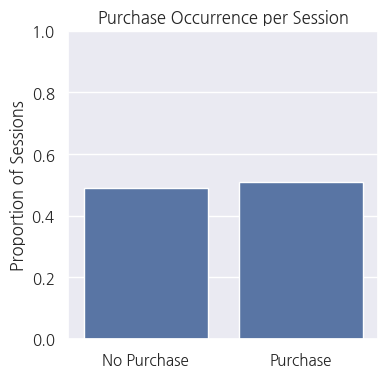

In [14]:
# 세션별 구매 여부 (purchase 이벤트가 있는지)
session_purchase = df.groupby("user_session")["event_type"].apply(lambda x: "purchase" in x.values).reset_index(name="has_purchase")

# 구매 세션 비율
purchase_rate = session_purchase["has_purchase"].mean()
print(f"세션당 구매 발생률: {purchase_rate:.2%}")

# 막대 그래프
plt.figure(figsize=(4,4))
sns.barplot(x=["No Purchase", "Purchase"],
            y=[1 - purchase_rate, purchase_rate])
plt.title("Purchase Occurrence per Session")
plt.ylabel("Proportion of Sessions")
plt.ylim(0, 1)
plt.show()

### 카트에 담는 수에 따라 구매율이 어떻게 달라지는지 분석

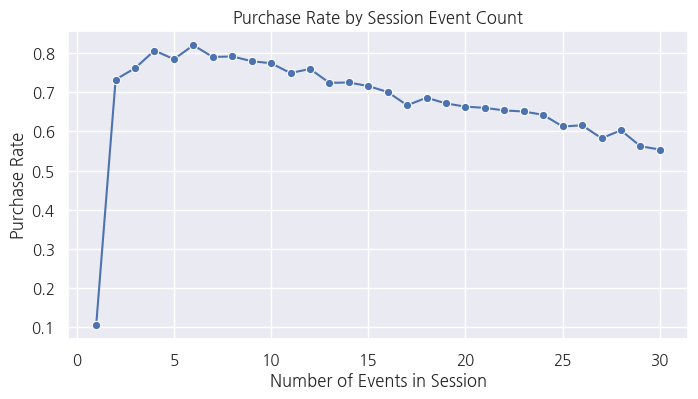

In [15]:
# cart 수 & purchase 여부 함께 계산
session_stats = df.groupby("user_session").agg({
    "event_type": lambda x: "purchase" in x.values,
    "user_id": "count"
}).rename(columns={"event_type": "has_purchase", "user_id": "event_count"})

# 구매율을 카트 담는 수에 따라 시각화
session_stats["event_count"] = session_stats["event_count"].clip(upper=30)  # 너무 긴 세션은 30으로 잘라서 표시

purchase_by_carts = session_stats.groupby("event_count")["has_purchase"].mean().reset_index()

# 시각화
plt.figure(figsize=(8,4))
sns.lineplot(data=purchase_by_carts, x="event_count", y="has_purchase", marker="o")
plt.title("Purchase Rate by Session Event Count")
plt.xlabel("Number of Events in Session")
plt.ylabel("Purchase Rate")
plt.grid(True)
plt.show()